## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
data = pd.read_excel("Airlines+Data.xlsx")

In [3]:
data.sample(5)

,Month,Passengers
13,1996-02-01,126
42,1998-07-01,230
49,1999-02-01,196
9,1995-10-01,119
74,2001-03-01,267


In [4]:
data.tail(5)

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


## Time Series Analysis
## Plot time series data

<AxesSubplot:>

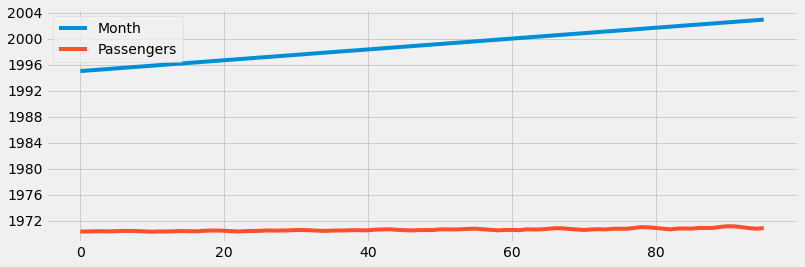

In [5]:
data.plot(figsize=(12,4))

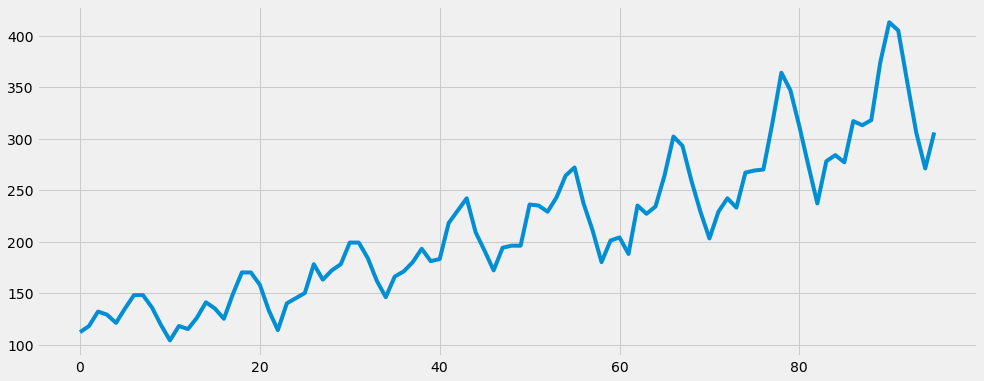

In [6]:
data['Passengers'].plot(figsize=(15, 6))
plt.show()

In [7]:
data = data.set_index('Month')

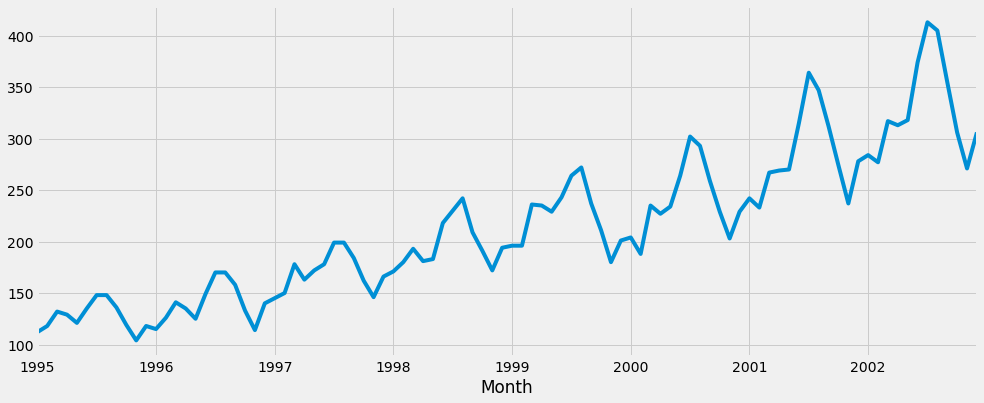

In [8]:
data['Passengers'].plot(figsize=(15, 6))
plt.show()

# Handling missing values

In [9]:
data.isnull().sum()

Passengers    0
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


# Outlier detection
# Box plot 

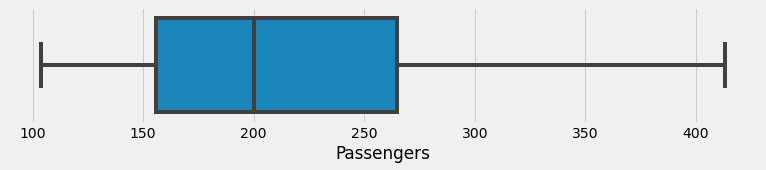

In [11]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(data['Passengers'], whis=1.5)


<AxesSubplot:>

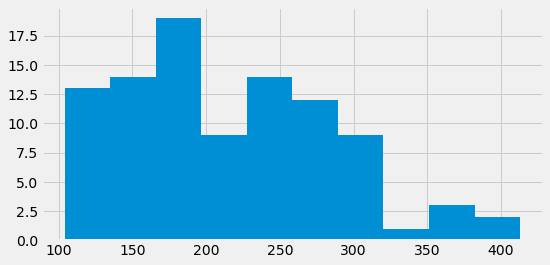

In [12]:
data['Passengers'].hist(figsize=(8,4))

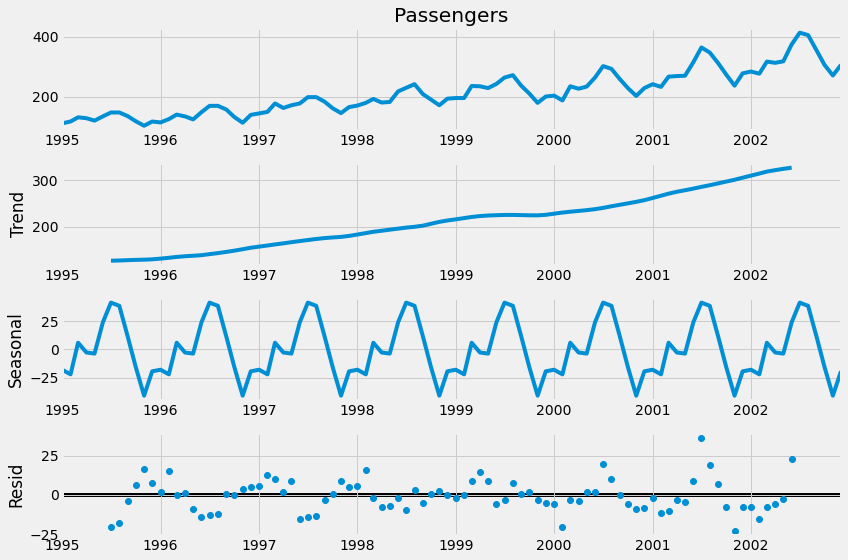

In [13]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='additive')
fig = decomposition.plot()
plt.show()

# Multiplicative seasonal decomposition


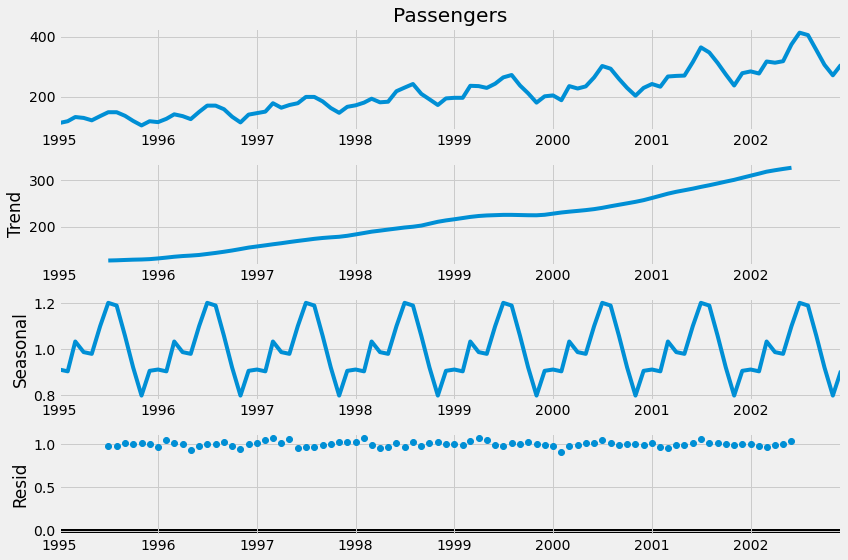

In [14]:
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='multiplicative')
fig = decomposition.plot()
plt.show()

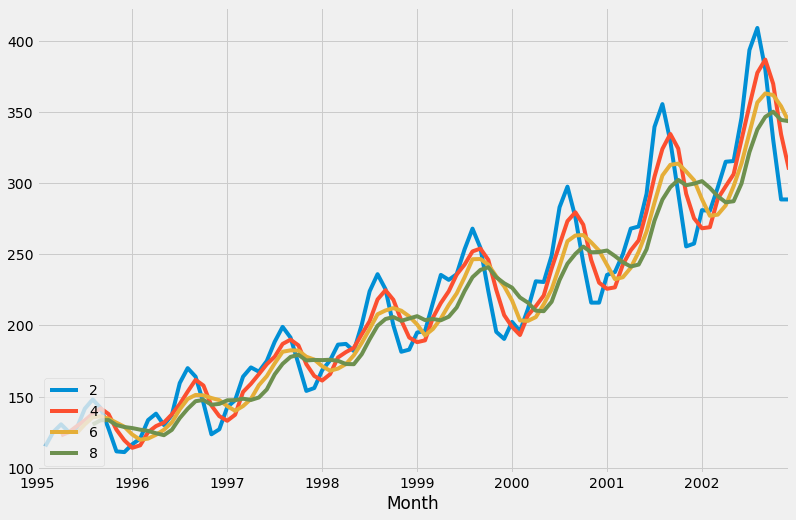

In [15]:
for i in range(2,10,2):
    data['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

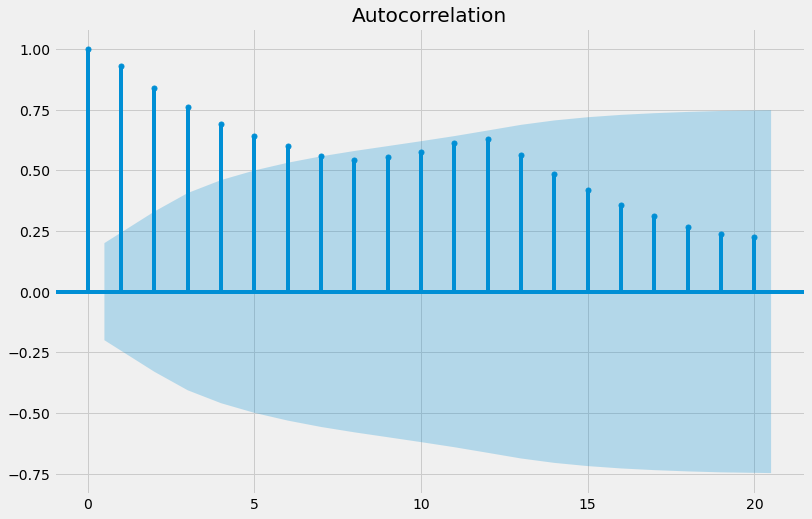

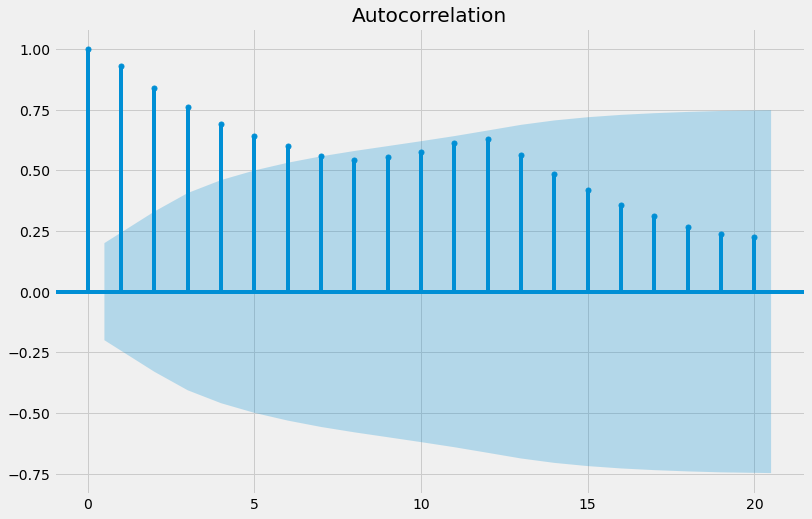

In [16]:
tsa_plots.plot_acf(data['Passengers'])

# Build and Evaluate time series forecast

In [17]:
train_len = 80
train = data[0:train_len]

test = data[train_len:]

In [18]:
train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2001-04-01,269
2001-05-01,270
2001-06-01,315


In [19]:
test

,Passengers
Month,
2001-09-01,312
2001-10-01,274
2001-11-01,237
2001-12-01,278
2002-01-01,284
2002-02-01,277
2002-03-01,317
2002-04-01,313
2002-05-01,318


In [20]:
train_len

80

In [21]:
test

,Passengers
Month,
2001-09-01,312
2001-10-01,274
2001-11-01,237
2001-12-01,278
2002-01-01,284
2002-02-01,277
2002-03-01,317
2002-04-01,313
2002-05-01,318


### Naive method -->
### Forecast = Last month’s data

### Or the last data of the train set, which will be assigned to all the records of the test data.

In [22]:
 #Creating a new dataframe by copying the test data
# Because we will forecast the last two years data and comapre the forecast in this new coppied dataframe.
y_hat_naive = test.copy()
y_hat_naive.head()

,Passengers
Month,
2001-09-01,312
2001-10-01,274
2001-11-01,237
2001-12-01,278
2002-01-01,284


In [23]:
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

In [24]:
y_hat_naive.head()

,Passengers,naive_forecast
Month,,
2001-09-01,312,347
2001-10-01,274,347
2001-11-01,237,347
2001-12-01,278,347
2002-01-01,284,347


# Plot train, test and forecast data

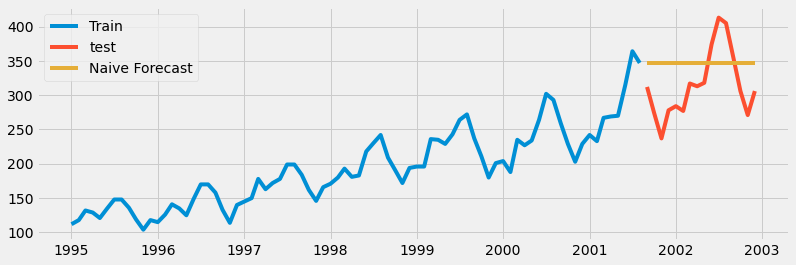

In [25]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

In [26]:
##Simple average method
##Forecast = Average of all past months’ data

##Average of all the train data values assigned to the test data.

y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()
y_hat_avg.head()

,Passengers,avg_forecast
Month,,
2001-09-01,312,193.45
2001-10-01,274,193.45
2001-11-01,237,193.45
2001-12-01,278,193.45
2002-01-01,284,193.45


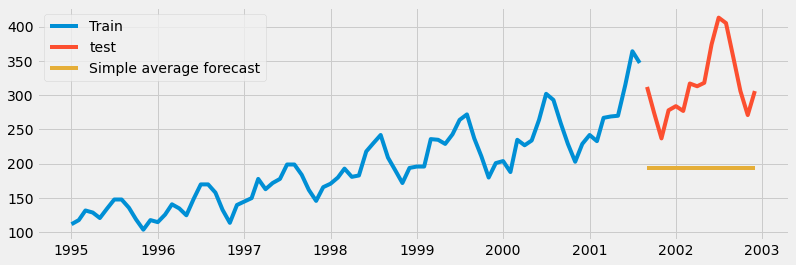

In [27]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()

# Calculate RMSE and MAPE Error

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
# mean_squared_error is a sqaured term of the error
# In order to make the error comparable with the target variable, we have to take the square root of the error (RMSE)
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
rmse

57.46

In [30]:
#MAPE (Mean absolute percentage error)
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_naive['naive_forecast'])/test['Passengers'])*100),2)
mape

17.54

In [31]:
results = pd.DataFrame({'Method':['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})
results

,Method,RMSE,MAPE
0,Naive method,57.46,17.54


# MAPE is the percentage of error.

# So, we can see that we are around 83% accurate to forecast.

## Error for Simple average method
     <--RMSE -->

In [32]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
rmse


mape = round(np.mean(np.abs((test['Passengers'] - y_hat_avg['avg_forecast'])/test['Passengers'])*100),2)
mape

results = results.append({'Method':'Simple average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,57.46,17.54
1,Simple average method,130.58,37.25


## Exponential Smoothing Family
## Simple exponential smoothing (Captures - Only Level)
## Holt's exponential smoothing (Level+Trend)
## Holt's Winter exponential smoothing (Level+Trend+Seasonality)
## Simple Exponential Smoothing

In [33]:
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level = 0.2, optimized=False)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [34]:
y_hat_ses = test.copy()

# Forecast for 24 months
y_hat_ses['ses_forecast'] = model_fit.forecast(16)

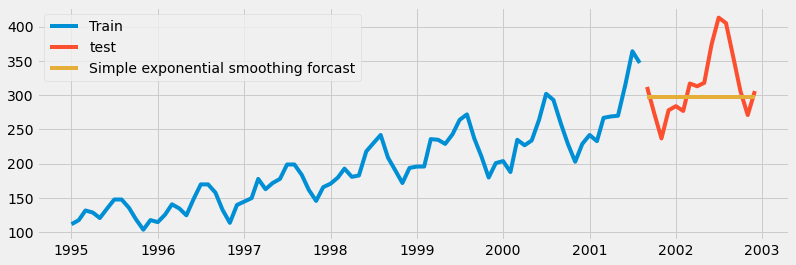

In [35]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [36]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
rmse

50.86

In [37]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_ses['ses_forecast'])/test['Passengers'])*100),2)
mape

11.38

In [38]:
results = results.append({'Method':'Simple expenential smoothing method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,57.46,17.54
1,Simple average method,130.58,37.25
2,Simple expenential smoothing method,50.86,11.38


### Holt's Exponential Smoothing method

In [39]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='additive', seasonal=None)

In [40]:
model_fit = model.fit(smoothing_level = 0.2, smoothing_slope = 0.01, optimized=False)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [41]:
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(16)

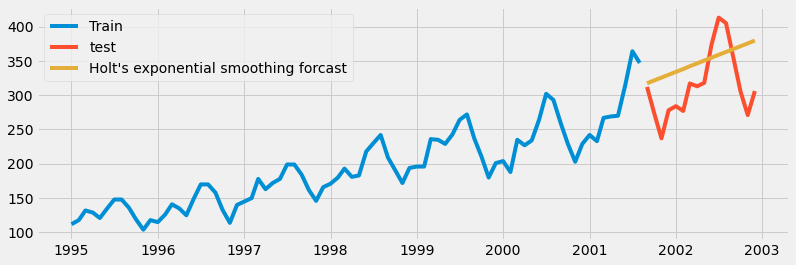

In [42]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [43]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
rmse

54.57

In [44]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_holt['holt_forecast'])/test['Passengers'])*100),2)
mape

16.22

In [45]:
results = results.append({'Method':'Holt\'s expenential smoothing method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,57.46,17.54
1,Simple average method,130.58,37.25
2,Simple expenential smoothing method,50.86,11.38
3,Holt's expenential smoothing method,54.57,16.22


# Holt-Winters's Exponential Smoothing


In [46]:
y_hat_hwa = test.copy()

In [47]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='additive', seasonal='additive')

In [48]:
model_fit = model.fit(optimized=True)


In [49]:
model_fit.params

{'smoothing_level': 0.8886517246214445,
 'smoothing_trend': 3.453712163319675e-09,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 169.36311334383188,
 'initial_trend': 2.3143229948839052,
 'initial_seasons': array([-59.26651862, -60.72355338, -35.75204307, -44.20908574,
        -47.23769587, -25.55198661,  -2.86640123,  -6.03792117,
        -31.60723537, -56.92164848, -80.23600693, -61.05037159]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [50]:
y_hat_hwa['hwa_forecast'] = model_fit.forecast(16)

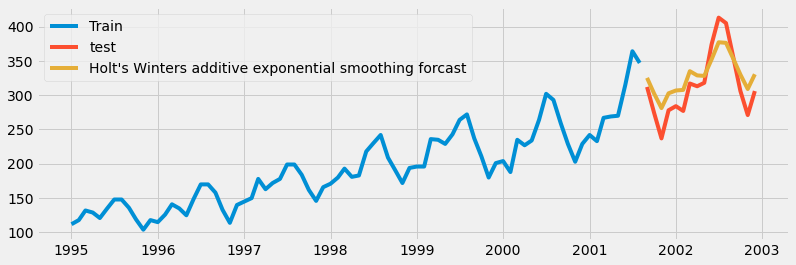

In [51]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt\'s Winters additive exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

## Analysis
### It captures the trend, which we can see that the forecasted values are little higher level than the train level.
### It also captures teh seasonality.
### The peak of the forecasted value is little higher than the actual.

In [52]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hwa_forecast'])).round(2)
rmse

26.09

In [53]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_hwa['hwa_forecast'])/test['Passengers'])*100),2)
mape

7.95

In [54]:
results = results.append({'Method':'Holt\'s Winter additive method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,57.46,17.54
1,Simple average method,130.58,37.25
2,Simple expenential smoothing method,50.86,11.38
3,Holt's expenential smoothing method,54.57,16.22
4,Holt's Winter additive method,26.09,7.95


### Analysis
We can see that the errors have reduced drastically once we are able to capture the level, trend and seasonality altogether.

# Seasonal Auto Regressive Integrated Moving Average (SARIMA)

In [55]:
#Converting Non-Stationary to Stationary Time Series
#Box Cox Transformation
#Box-Cox transformation makes the variance constant in a series.

from scipy.stats import boxcox

In [56]:
# Creating a new dataset with the boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda=0), data.index)
data_boxcox.head()

Month
1995-01-01    4.718499
1995-02-01    4.770685
1995-03-01    4.882802
1995-04-01    4.859812
1995-05-01    4.795791
dtype: float64

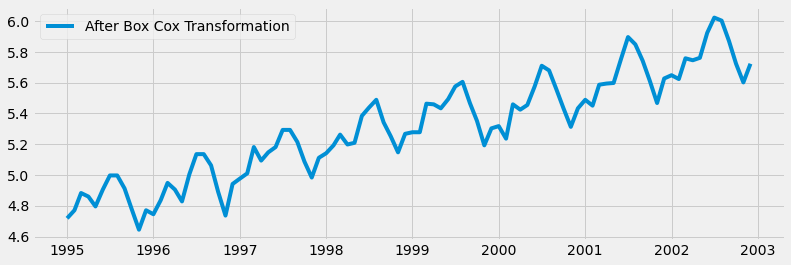

In [57]:
# Plotting the Time series after transformation
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.show()


# We can see the variance became almost constant after the transformation. Both in the earlier and later years the variance is almost similar.

In [58]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index=data.index)

In [59]:
data_boxcox_diff.dropna(inplace=True)

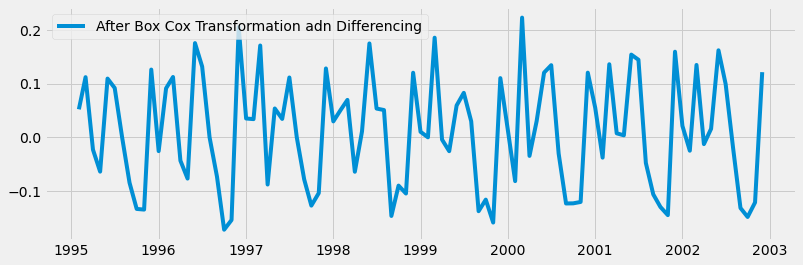

In [60]:
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation adn Differencing')
plt.legend(loc='best')
plt.show()

In [61]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]


In [62]:
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))


In [63]:
model_fit = model.fit()
model_fit.params

ar.L1       0.244084
ma.L1      -0.617216
ar.S.L12   -0.099698
ma.S.L12   -0.522366
sigma2      0.001792
dtype: float64

In [64]:
y_hat_sarima = data_boxcox_diff.copy()

In [65]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

In [66]:
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

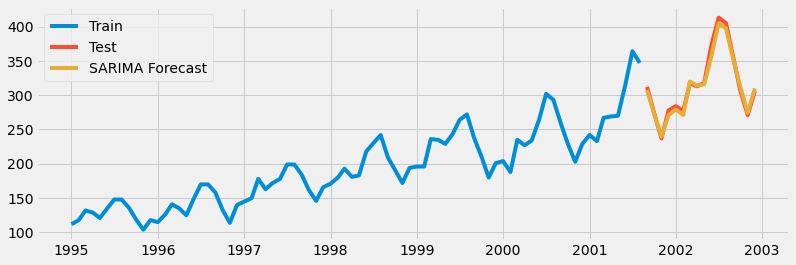

In [67]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()


In [68]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
rmse

6.1

In [69]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_sarima['sarima_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape

1.53

In [70]:
results = results.append({'Method':'SARIMA method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,57.46,17.54
1,Simple average method,130.58,37.25
2,Simple expenential smoothing method,50.86,11.38
3,Holt's expenential smoothing method,54.57,16.22
4,Holt's Winter additive method,26.09,7.95
5,SARIMA method,6.10,1.53


# SARIMA method has done reasonably well as it captures seasonality.
# Teh performance is comparable with the other method such as Holt's Winter additive/multiplicative, which also cpatures seasonality.